## Importing libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats 
from scipy.stats import pearsonr
import math
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

## Importing And Exploring Data Analysis

In [2]:
#Reading csv file for salaries
salaries = pd.read_csv("salary.csv")
salaries.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
#dataframe shape
salaries.shape

(514, 11)

In [4]:
#Checking columns and their datatypes
salaries.columns.to_series().groupby(salaries.dtypes).groups

{dtype('int64'): Index(['exprior', 'yearsworked', 'yearsrank', 'degree', 'otherqual',
        'position', 'male', 'Field', 'yearsabs'],
       dtype='object'),
 dtype('float64'): Index(['salary', 'market'], dtype='object')}

There are 9 integer columns and two float columns

In [5]:
#Checking columns and missing values
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       513 non-null    float64
 1   exprior      514 non-null    int64  
 2   yearsworked  514 non-null    int64  
 3   yearsrank    514 non-null    int64  
 4   market       514 non-null    float64
 5   degree       514 non-null    int64  
 6   otherqual    514 non-null    int64  
 7   position     514 non-null    int64  
 8   male         514 non-null    int64  
 9   Field        514 non-null    int64  
 10  yearsabs     514 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


•There are 514 entries.

•The number of columns is 11 will the number of rows is 514.

•There are two floats and 11 integers.

•And there is one missing value in salary

In [6]:
#Statistical summary of dataframe
salaries.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


## 1.1 Examining missing values 

In [7]:
#Examining null values in salary and filling null with median

salary_nan = salaries.fillna(salaries['salary'].median())

salary_nan.isnull().sum()


salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

## 1.2 Splitting data into training and testing

In [8]:
#Creating training and testing variables

X_data = salaries.yearsworked
y_data = salaries.salary

#Slipping data into training and testing set wit an 80-20
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,

                                                    test_size = 0.20, random_state = None)
#View head yearsworked
y_train.head()


477    39574.0
169    49357.0
303    62173.0
354    63357.0
255    73349.0
Name: salary, dtype: float64

In [9]:
#checking testing for shaping
print (X_train.shape, y_train.shape)

(411,) (411,)


## 1.3 Examining extreme values

In [10]:
#Calculating the InterQuartile Range for salary
Q1_y = salaries["salary"].quantile(0.25)
Q3_y = salaries["salary"].quantile(0.75)
IQR_y = Q3_y - Q1_y
print("InterQuartile Range for salary =",IQR_y)



InterQuartile Range for salary = 20345.0


In [11]:
#Calculating Lower and upper bound of salary
Q3_y = np.percentile(Q3_y, 75)
upper_bound_y = Q3_y + 1.5 * IQR_y
lower_bound_y = Q1_y - IQR_y *1.5
print("Lower bound for salary =", lower_bound_y)
print("Upper bound for salary =", upper_bound_y)

Lower bound for salary = 9482.5
Upper bound for salary = 90862.5


In [12]:
y_train[y_train > upper_bound_y]

377    96156.0
Name: salary, dtype: float64

In [13]:
#Checking skewness of salary 

print(salaries["salary"].skew())

0.44822260266498243


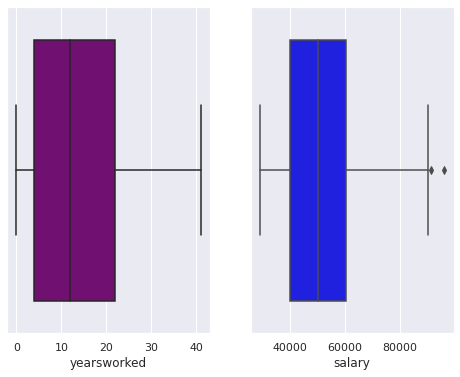

In [14]:
#Using boxplots to visualise distribution
sns.set()
fig, axes = plt.subplots(1,2, figsize = (8, 6))
sns.boxplot(x = salaries["yearsworked"], ax = axes[0], data = salaries, color = "purple")
sns.boxplot(x = salaries["salary"], ax = axes[1], data = salaries, color = "blue")
plt.show()


## 1.4 Creating a distribution histogram plot

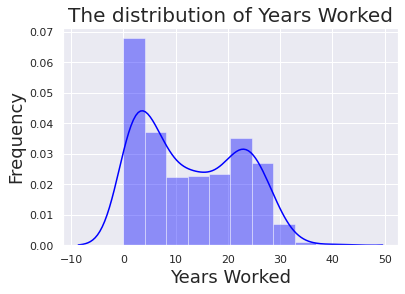

In [15]:
# The histogram distribution is now visualized for yearsworked

sns.distplot(salaries["yearsworked"], kde = True, color = "blue")
plt.title("The distribution of Years Worked", fontsize = 20)
plt.xlabel("Years Worked", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)
plt.show;



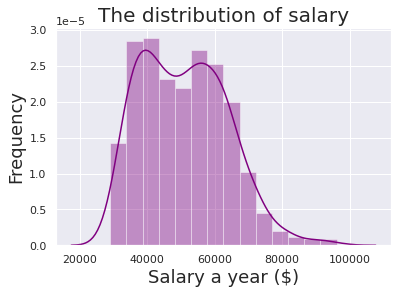

In [16]:
# The histogram distribution is now visualized for Salary per year

sns.distplot(salaries["salary"], kde = True, color = "purple")
plt.title("The distribution of salary", fontsize = 20)
plt.xlabel("Salary a year ($)", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)
plt.show;

## 1.5 Creating a regression scatter plot

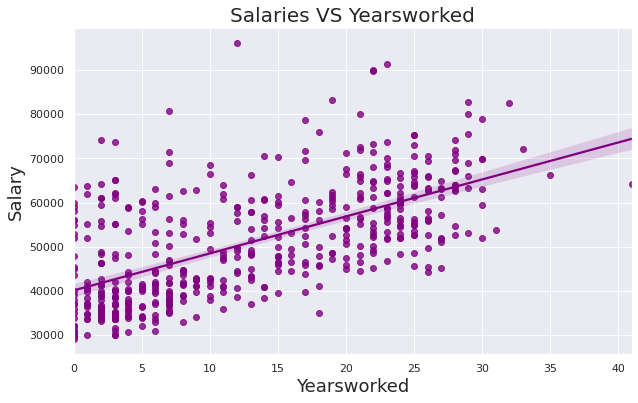

In [17]:
# A regression scatter plot to visualise the training data for salary and
#yearsworked
plt.figure(figsize = (10,6))
sns.regplot(X_data, y_data, color = "purple")
_= plt.title("Salaries VS Yearsworked", fontsize = 20)
_= plt.xlabel("Yearsworked", fontsize = 18)
_= plt.ylabel("Salary", fontsize = 18)




In [18]:
## scalar

In [22]:
def new_shape(scalar_series):
    
    if type(scalar_series) == float or type(scalar_series) == int:
        scalar_series = np.array(scalar_series).reshape(1, -1)
        
    else:
        assert type(scalar_series) == pd.core.series.Series
        scalar_series= np.array(scalar_series).reshape(-1, 1)
        
    return scalar_series

In [28]:
X = new_shape(X_data)
y = new_shape(y_data)

In [29]:
lm = linear_model.LinearRegression()

In [30]:
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[15 13 24 26 22 12 26  2  0 24 10 22 25  3  4  6 27  2  6  2  2 15 19 15
 24  2 27 25 30  2 21 26 25  4  6 25  7 28 26 16 14 27 30 26 15  3 10 17
  0  3 14  5 23 18  0 13 12  6  3 20  8 17  3 24 22  3 17 11  1 18 12  3
  4 28 26 14 21 10  0  4 22  1 21 17  6 25  4 15  8  3 25  3 11  7 13  2
 28 13 27  7 35  0 19 13 15  2 22  9 29  2 14 29 27  8 17 33 11 20 20  9
  7  3  0 17 17 17  6 19  1 13  7  0  3 19  4  5 24 22 10  5 23 17  7  4
  0  4  7  4  9 28  8 24  2  0 25  6  2 12  7  0  3 20  5 11 14  3  2  0
 21 13 21 23  6  4 29 23 25 21 20  7 19  6 28 28 10 15  2 25  2 16 12 22
  4  5 11 20 25 19  6  1  7  7 12  0 12 25  3  3 23 22  3 24  8  0  3 30
  5  0  5 20  3  7 27 29 26 20  2 10 14 23 13 21 30  2 21  2 18  0 17  2
  4  9  8 14  0 24 22  2 16  1 11  0 15  3 26 12  0 10 25 23  4  6  0 13
 28 15 10  1  0 17  3 13  8 21 23  6 22  0 15  1 24  0 22  0 11 20 24  2
  7 15 19 28  7  5  7 22  0  5 10 21 26  8  4 20  3 25 19 13 13 12 23  2
 17 26  3  5 15  0  5 20 23 18 12 19 16 28 21 22  5  4  2  2  3 22  4  6
 15 24 28  8 23 18  7  2  3  6 25 30  6 10 23 27 15 26 20 18  4  0 24 29
  2  3  0  4 25  2  4 13  4  0 14 24 26 15 12 20  7  3  8  2 22 22  2 22
 28 21 24 13 29  2  1  3 31 17  3  4  5 19 24  6 28 20  1  1 24  9  9 16
  3  1  7].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.